In [8]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import keras

In [9]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [10]:
import cv2
import imghdr

In [11]:
data_dir = 'drive/MyDrive/kaggle/plant-disease-classification-smaller-dataset'

In [12]:
label = []
print(os.getcwd())
for test_train_class in os.listdir(data_dir):
    if test_train_class!='.ipynb_checkpoints':
      print(test_train_class)
      label.append(test_train_class)

/content
Apple__black_rot
Apple__healthy
Apple__rust
Apple__scab
Coffee__cercospora_leaf_spot
Coffee__healthy
Coffee__red_spider_mite
Coffee__rust
Grape__black_measles
Grape__black_rot
Grape__healthy
Grape__leaf_blight_(isariopsis_leaf_spot)
Mango__diseased
Mango__healthy
Lemon__diseased
Lemon__healthy
Potato__early_blight
Potato__healthy
Potato__late_blight
Rice__brown_spot
Rice__healthy
Rice__hispa
Rice__leaf_blast
Rice__neck_blast
Wheat__brown_rust
Wheat__Healthy
Wheat__septoria
Wheat__stripe_rust
Wheat__yellow_rust
Tea__algal_leaf
Tea__anthracnose
Tea__bird_eye_spot
Tea__brown_blight
Tea__healthy
Tea__red_leaf_spot
Sugarcane__bacterial_blight
Sugarcane__healthy
Sugarcane__red_rot
Sugarcane__red_stripe
Sugarcane__rust


In [13]:
label.sort()
label

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
 'Sugarcane__bacterial_blight',
 'Sugarcane__healthy',
 'Sugarcane__red_rot',
 'Sugarcane__red_stripe',
 'Sugarcane__rust',
 'Tea__algal_leaf',
 'Tea__anthracnose',
 'Tea__bird_eye_spot',
 'Tea__brown_blight',
 'Tea__healthy',
 'Tea__red_leaf_spot',
 'Wheat__Healthy',
 'Wheat__brown_rust',
 'Wheat__septoria',
 'Wheat__stripe_rust',
 'Wheat__yellow_rust']

In [14]:
n = len(label)
n

40

In [15]:
img = cv2.imread('drive/MyDrive/kaggle/plant-disease-classification-smaller-dataset/Apple__black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG')
img.shape

(256, 256, 3)

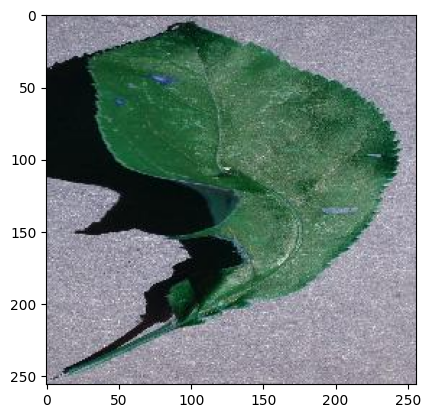

In [16]:
plt.imshow(img)

In [17]:
from keras import Sequential, Model
from keras.activations import softmax
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

In [18]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=10,
                             width_shift_range = 0.1,
                             height_shift_range=0.1,
                             shear_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                             validation_split=0.15)

# Create a data generator for your entire dataset with a validation split
batch_size = 32
image_size = (128, 128)  # Set to your desired image size
validation_split = 0.15  # Define the validation split ratio (e.g., 15%)
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',         # Use 'training' subset for the training generator

)

# You can also create a separate validation generator if needed
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',  # Use 'validation' subset for the validation generator

)

Found 15770 images belonging to 40 classes.
Found 2771 images belonging to 40 classes.


In [19]:
validation_generator.class_indices

{'Apple__black_rot': 0,
 'Apple__healthy': 1,
 'Apple__rust': 2,
 'Apple__scab': 3,
 'Coffee__cercospora_leaf_spot': 4,
 'Coffee__healthy': 5,
 'Coffee__red_spider_mite': 6,
 'Coffee__rust': 7,
 'Grape__black_measles': 8,
 'Grape__black_rot': 9,
 'Grape__healthy': 10,
 'Grape__leaf_blight_(isariopsis_leaf_spot)': 11,
 'Lemon__diseased': 12,
 'Lemon__healthy': 13,
 'Mango__diseased': 14,
 'Mango__healthy': 15,
 'Potato__early_blight': 16,
 'Potato__healthy': 17,
 'Potato__late_blight': 18,
 'Rice__brown_spot': 19,
 'Rice__healthy': 20,
 'Rice__hispa': 21,
 'Rice__leaf_blast': 22,
 'Rice__neck_blast': 23,
 'Sugarcane__bacterial_blight': 24,
 'Sugarcane__healthy': 25,
 'Sugarcane__red_rot': 26,
 'Sugarcane__red_stripe': 27,
 'Sugarcane__rust': 28,
 'Tea__algal_leaf': 29,
 'Tea__anthracnose': 30,
 'Tea__bird_eye_spot': 31,
 'Tea__brown_blight': 32,
 'Tea__healthy': 33,
 'Tea__red_leaf_spot': 34,
 'Wheat__Healthy': 35,
 'Wheat__brown_rust': 36,
 'Wheat__septoria': 37,
 'Wheat__stripe_rust':

In [20]:
from keras.layers import Input , Dense , Flatten , GlobalAveragePooling2D

addModel = tf.keras.applications.xception.Xception(input_shape=(128,128,3),
                                           include_top=False,
                                           weights='imagenet')

model = Sequential()
model.add(addModel)
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(n, activation="softmax" , name="classification"))

83683744/83683744 [==============================] - 1s 0us/step


In [21]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0007,momentum=0.9),
            loss='categorical_crossentropy',
            metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 4, 4, 2048)        20861480  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 classification (Dense)      (None, 40)                20520     
                                                        

In [22]:
logdir = 'drive/MyDrive/kaggle/log'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
from keras.callbacks import EarlyStopping,ModelCheckpoint

In [25]:
checkpoint_filepath='drive/MyDrive/kaggle/weights/smaller_dataset_best_model_1.hdf5'

In [26]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint=ModelCheckpoint(filepath=checkpoint_filepath,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=True,
                             save_freq='epoch',
                             mode='min')

In [27]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 10, callbacks=[tensorboard_callback, early_stopping,model_checkpoint])

Epoch 1/10
493/493 [==============================] - ETA: 0s - loss: 1.8889 - accuracy: 0.5068 
Epoch 1: val_loss improved from inf to 1.20718, saving model to drive/MyDrive/kaggle/weights/smaller_dataset_best_model_1.hdf5
493/493 [==============================] - 7261s 15s/step - loss: 1.8889 - accuracy: 0.5068 - val_loss: 1.2072 - val_accuracy: 0.6831
Epoch 2/10
493/493 [==============================] - ETA: 0s - loss: 0.9661 - accuracy: 0.7344
Epoch 2: val_loss improved from 1.20718 to 0.72475, saving model to drive/MyDrive/kaggle/weights/smaller_dataset_best_model_1.hdf5
493/493 [==============================] - 461s 932ms/step - loss: 0.9661 - accuracy: 0.7344 - val_loss: 0.7247 - val_accuracy: 0.7809
Epoch 3/10
493/493 [==============================] - ETA: 0s - loss: 0.5610 - accuracy: 0.8249
Epoch 3: val_loss improved from 0.72475 to 0.40682, saving model to drive/MyDrive/kaggle/weights/smaller_dataset_best_model_1.hdf5
493/493 [==============================] - 451s 915ms

In [28]:
validation_generator.class_indices

{'Apple__black_rot': 0,
 'Apple__healthy': 1,
 'Apple__rust': 2,
 'Apple__scab': 3,
 'Coffee__cercospora_leaf_spot': 4,
 'Coffee__healthy': 5,
 'Coffee__red_spider_mite': 6,
 'Coffee__rust': 7,
 'Grape__black_measles': 8,
 'Grape__black_rot': 9,
 'Grape__healthy': 10,
 'Grape__leaf_blight_(isariopsis_leaf_spot)': 11,
 'Lemon__diseased': 12,
 'Lemon__healthy': 13,
 'Mango__diseased': 14,
 'Mango__healthy': 15,
 'Potato__early_blight': 16,
 'Potato__healthy': 17,
 'Potato__late_blight': 18,
 'Rice__brown_spot': 19,
 'Rice__healthy': 20,
 'Rice__hispa': 21,
 'Rice__leaf_blast': 22,
 'Rice__neck_blast': 23,
 'Sugarcane__bacterial_blight': 24,
 'Sugarcane__healthy': 25,
 'Sugarcane__red_rot': 26,
 'Sugarcane__red_stripe': 27,
 'Sugarcane__rust': 28,
 'Tea__algal_leaf': 29,
 'Tea__anthracnose': 30,
 'Tea__bird_eye_spot': 31,
 'Tea__brown_blight': 32,
 'Tea__healthy': 33,
 'Tea__red_leaf_spot': 34,
 'Wheat__Healthy': 35,
 'Wheat__brown_rust': 36,
 'Wheat__septoria': 37,
 'Wheat__stripe_rust':

1/1 [==============================] - 0s 60ms/step
5


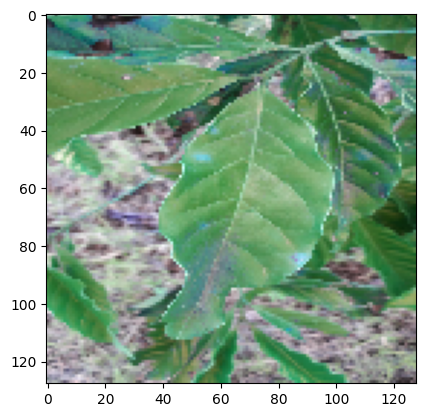

In [30]:
from PIL import Image
import cv2
def preprocess_image(image_path, target_size):
   # Read the image
   image = cv2.imread(image_path)

   # Resize the image
   image_resized = cv2.resize(image, target_size)

   return image_resized

image=preprocess_image('drive/MyDrive/kaggle/plant-disease-classification-smaller-dataset/Coffee__rust/C10P12H2.jpg',(128,128))
image = np.array(image)
plt.imshow(image)
image = np.expand_dims(image, axis=0)
predictions = model.predict(image*(1./255))
print(predictions.argmax())

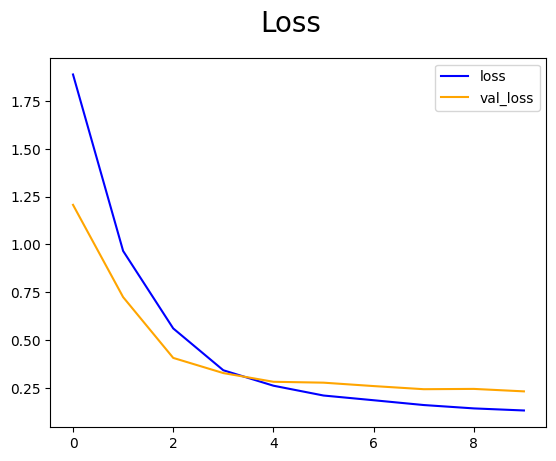

In [31]:
fig = plt.figure()
plt.plot(history.history['loss'], color='blue', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle("Loss", fontsize=20)
plt.legend(loc='upper right')
plt.show()

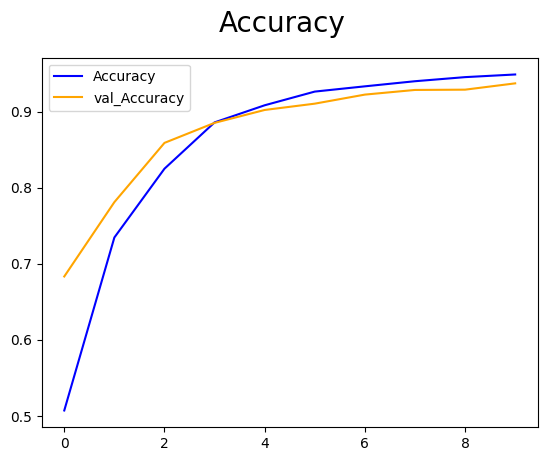

In [33]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_Accuracy')
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc='upper left')
plt.show()